# Notebook to reproduce _Supplementary Figure 22_

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import os

import plot_utils
import plot_settings

In [2]:
fig_dir = 'supplementary/figure_22/'

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

## Produce supplementary figure 22a,b

Supplementary Fig. 22a

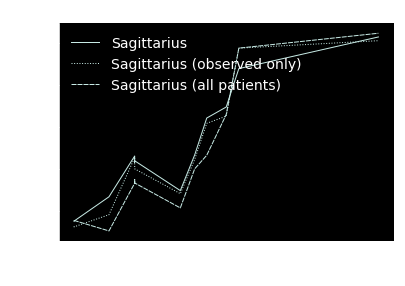

In [5]:
%matplotlib inline

CT = 'THCA'

with open('results/TCGA/ablation:{}_remaining_patient_aurocs.txt'.format(CT), 'r') as f:
    remaining_patient_aurocs = json.load(f)
with open('results/TCGA/{}_test_patient_times.txt'.format(CT), 'r') as f:
    test_patient_times = json.load(f)    

ax = plot_settings.get_wider_axis()
for mod in plot_settings.get_model_ordering(['Sagittarius', 'Sagittarius_ablation_noCensored', 'Sagittarius_ablation_allCensored']):
    plot_utils.line_plot(
        ax, xdata=[tt[0] for tt in test_patient_times] if CT == 'THCA' else [tt[0] for tt in test_patient_times[:-1]],
        ydata=[np.mean(aurocs) for aurocs in remaining_patient_aurocs[mod]] if CT == 'THCA' else \
                [np.mean(aurocs) for aurocs in remaining_patient_aurocs[mod][:-1]],
        xlabel='Shortest test patient survival time', ylabel='Average test patient AUROC', 
        color=plot_settings.get_model_colors(mod), label_marker=plot_settings.get_model_name_conventions(mod),
        linestyle=plot_settings.get_line_style(mod), linewidth=1)
plot_utils.format_legend(ax, *ax.get_legend_handles_labels(), loc='upper left')
plot_utils.format_ax(ax)
plt.title(CT)

plt.savefig(fig_dir + 'figure_22a.pdf', bbox_inches='tight')

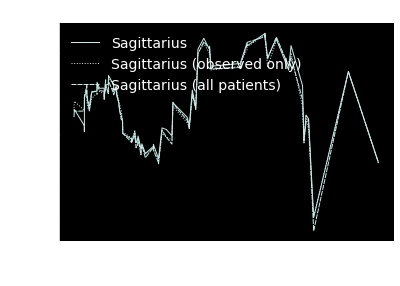

In [6]:
%matplotlib inline

CT = 'SARC'

with open('results/TCGA/ablation:{}_remaining_patient_aurocs.txt'.format(CT), 'r') as f:
    remaining_patient_aurocs = json.load(f)
with open('results/TCGA/{}_test_patient_times.txt'.format(CT), 'r') as f:
    test_patient_times = json.load(f)    

ax = plot_settings.get_wider_axis()
for mod in plot_settings.get_model_ordering(['Sagittarius', 'Sagittarius_ablation_noCensored', 'Sagittarius_ablation_allCensored']):
    plot_utils.line_plot(
        ax, xdata=[tt[0] for tt in test_patient_times] if CT == 'THCA' else [tt[0] for tt in test_patient_times[:-1]],
        ydata=[np.mean(aurocs) for aurocs in remaining_patient_aurocs[mod]] if CT == 'THCA' else \
                [np.mean(aurocs) for aurocs in remaining_patient_aurocs[mod][:-1]],
        xlabel='Shortest test patient survival time', ylabel='Average test patient AUROC', 
        color=plot_settings.get_model_colors(mod), label_marker=plot_settings.get_model_name_conventions(mod),
        linestyle=plot_settings.get_line_style(mod), linewidth=1)
plot_utils.format_legend(ax, *ax.get_legend_handles_labels(), loc='upper left')
plot_utils.format_ax(ax)
plt.title(CT)

plt.savefig(fig_dir + 'figure_22b.pdf', bbox_inches='tight')